In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [2]:
df = pd.read_csv("banking_loan_default_dataset.csv")

print("Shape:", df.shape)

Shape: (3500, 16)


In [3]:
df.head()


,customer_id,age,gender,marital_status,education,employment_type,annual_income,credit_score,loan_amount,loan_term,interest_rate,existing_loans,debt_to_income_ratio,late_payments,loan_purpose,default
0,1,59,Male,Married,High School,Salaried,101397.0,757.0,82585,120,14.76,5,84.18,12,Business,0
1,2,49,Male,Married,PhD,Self-employed,99509.0,344.0,456758,240,19.46,2,460.13,6,Personal,1
2,3,35,Female,Married,Master,Self-employed,37769.0,533.0,129147,60,24.40,2,346.93,1,Home,1
3,4,63,Male,Single,PhD,Salaried,198321.0,674.0,20628,36,22.24,2,12.49,1,Car,0
4,5,28,Male,Single,Master,Salaried,121584.0,846.0,392994,24,9.08,1,315.28,1,Personal,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           3500 non-null   int64  
 1   age                   3500 non-null   int64  
 2   gender                3500 non-null   object 
 3   marital_status        3500 non-null   object 
 4   education             3500 non-null   object 
 5   employment_type       3500 non-null   object 
 6   annual_income         3395 non-null   float64
 7   credit_score          3395 non-null   float64
 8   loan_amount           3500 non-null   int64  
 9   loan_term             3500 non-null   int64  
 10  interest_rate         3500 non-null   float64
 11  existing_loans        3500 non-null   int64  
 12  debt_to_income_ratio  3500 non-null   float64
 13  late_payments         3500 non-null   int64  
 14  loan_purpose          3500 non-null   object 
 15  default              

In [5]:
df.describe()

,customer_id,age,annual_income,credit_score,loan_amount,loan_term,interest_rate,existing_loans,debt_to_income_ratio,late_payments,default
count,3500.000000,3500.000000,3395.000000,3395.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,42.575429,109694.184683,572.667158,253361.725143,81.740571,14.991903,2.509429,328.581146,7.034000,0.800286
std,1010.507298,12.613872,51819.516521,158.431448,144111.721333,77.647323,5.767308,1.693648,337.651628,4.293097,0.399843
min,1.000000,21.000000,20005.000000,300.000000,5146.000000,12.000000,5.020000,0.000000,-8.230000,0.000000,0.000000
25%,875.750000,32.000000,64379.000000,435.000000,128693.000000,24.000000,10.017500,1.000000,117.375000,3.000000,1.000000
50%,1750.500000,43.000000,110197.000000,569.000000,253137.000000,60.000000,14.835000,2.000000,229.140000,7.000000,1.000000
75%,2625.250000,54.000000,154830.000000,708.000000,375949.000000,120.000000,20.100000,4.000000,399.885000,11.000000,1.000000
max,3500.000000,64.000000,199969.000000,850.000000,499970.000000,240.000000,24.990000,5.000000,2472.880000,14.000000,1.000000


In [6]:
# Identify feature types
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include="object").columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['customer_id', 'age', 'annual_income', 'credit_score', 'loan_amount',
       'loan_term', 'interest_rate', 'existing_loans', 'debt_to_income_ratio',
       'late_payments', 'default'],
      dtype='object')
Categorical Columns: Index(['gender', 'marital_status', 'education', 'employment_type',
       'loan_purpose'],
      dtype='object')


In [7]:
# Skewness
df[num_cols].skew()

customer_id             0.000000
age                    -0.037294
annual_income          -0.034444
credit_score            0.034001
loan_amount            -0.016216
loan_term               1.157060
interest_rate           0.037629
existing_loans         -0.004394
debt_to_income_ratio    2.343348
late_payments           0.004933
default                -1.502878
dtype: float64

In [8]:
default_percent = df["default"].value_counts(normalize=True) * 100
print(default_percent)

default
1    80.028571
0    19.971429
Name: proportion, dtype: float64


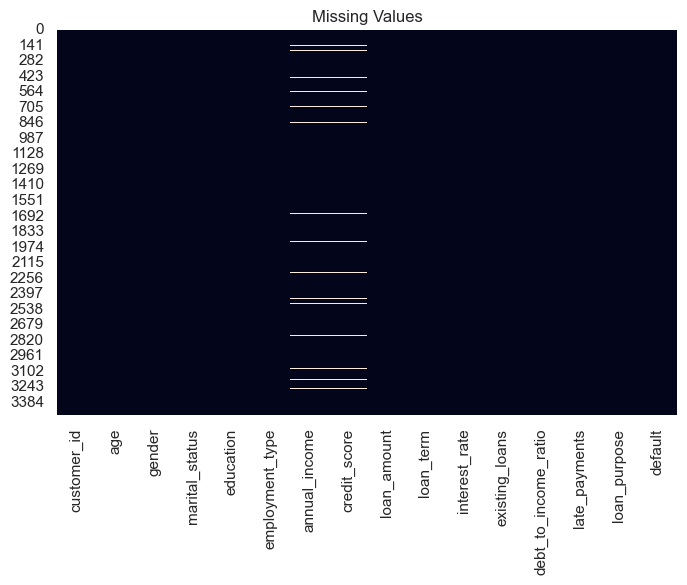

In [9]:
df.isnull().sum()

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values")
plt.show()

In [10]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [11]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 0


In [12]:
# Credit score normally 300–850
df = df[(df["credit_score"] >= 300) & (df["credit_score"] <= 850)]

# Remove negative income or loan
df = df[df["annual_income"] > 0]
df = df[df["loan_amount"] > 0]

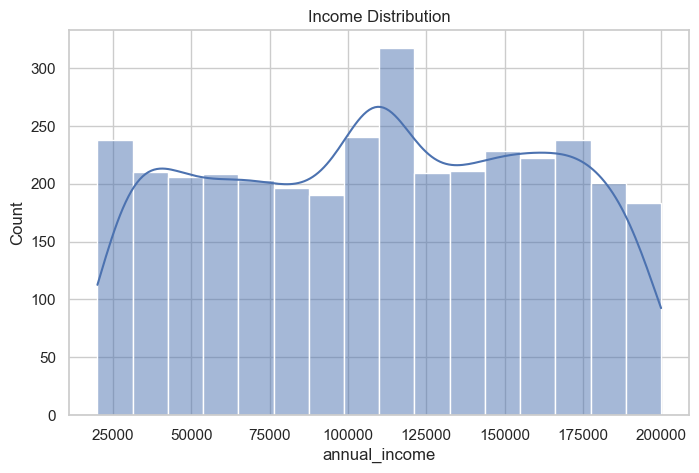

In [13]:
sns.histplot(df["annual_income"], kde=True)
plt.title("Income Distribution")
plt.show()

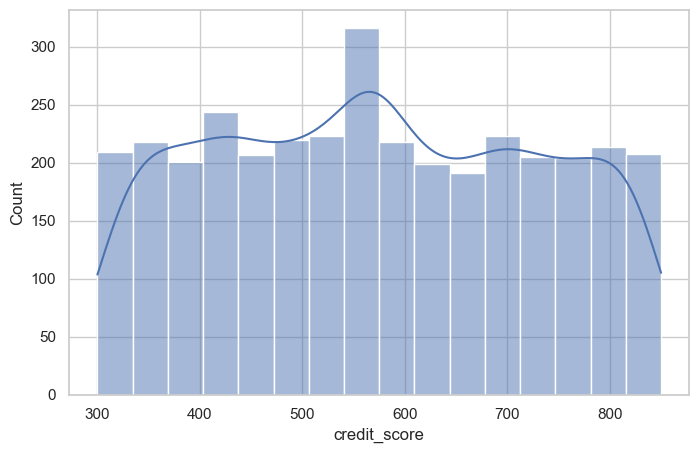

ShapiroResult(statistic=0.9592493283401138, pvalue=2.818743817197467e-30)

In [14]:
sns.histplot(df["credit_score"], kde=True)
plt.show()

stats.shapiro(df["credit_score"])

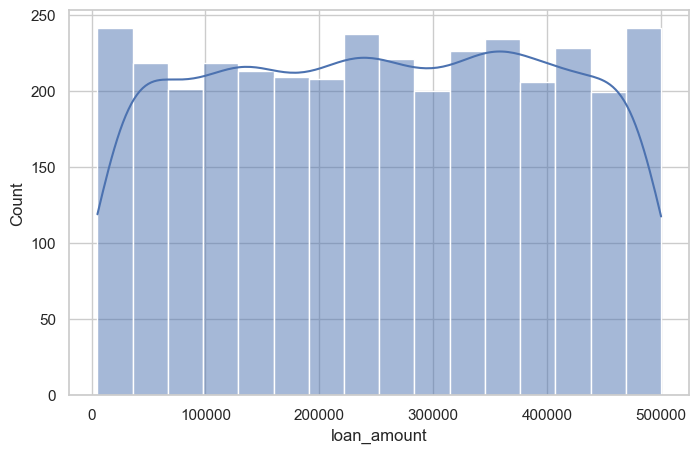

In [15]:
sns.histplot(df["loan_amount"], kde=True)
plt.show()

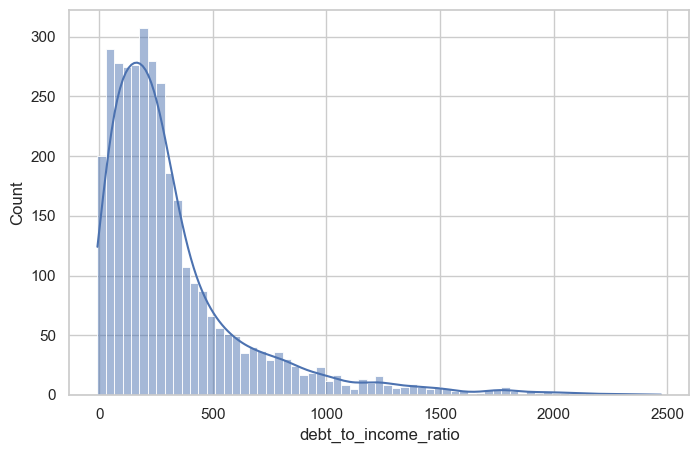

In [16]:
sns.histplot(df["debt_to_income_ratio"], kde=True)
plt.show()

In [17]:
df["income_category"] = pd.qcut(df["annual_income"],
                                3,
                                labels=["Low","Medium","High"])

df["income_category"].value_counts()

income_category
Low       1167
High      1167
Medium    1166
Name: count, dtype: int64

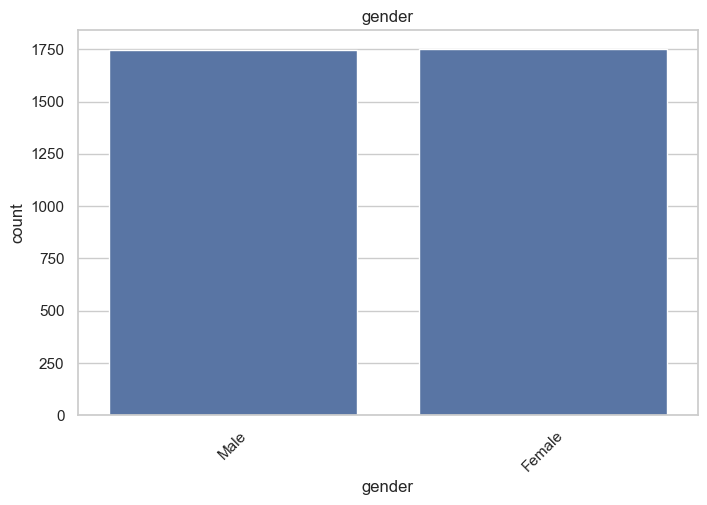

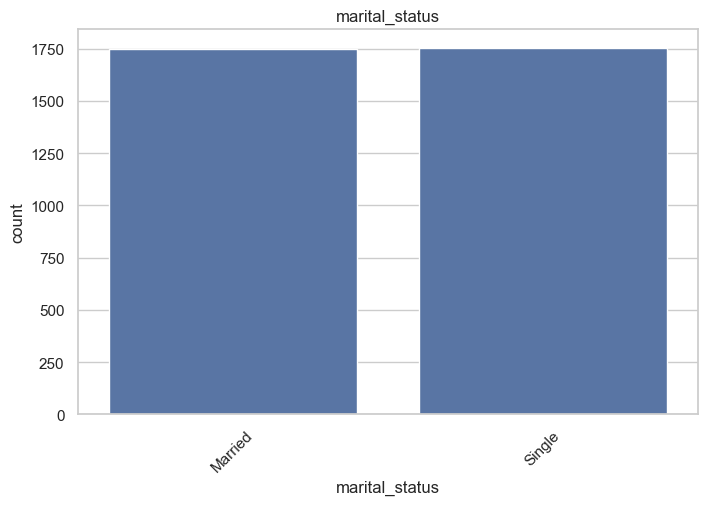

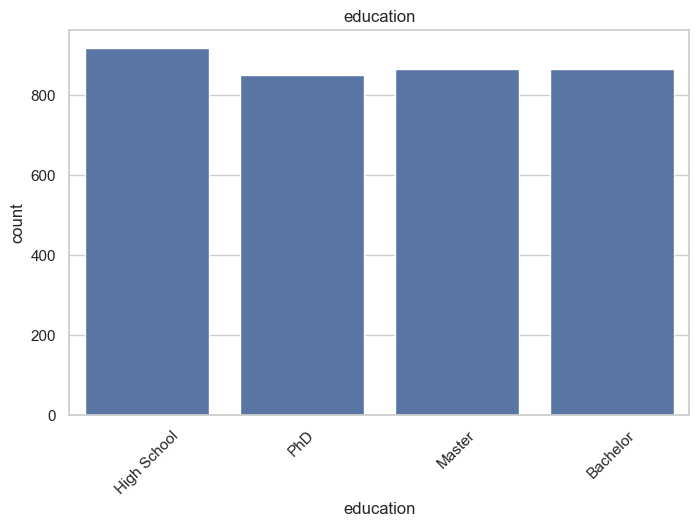

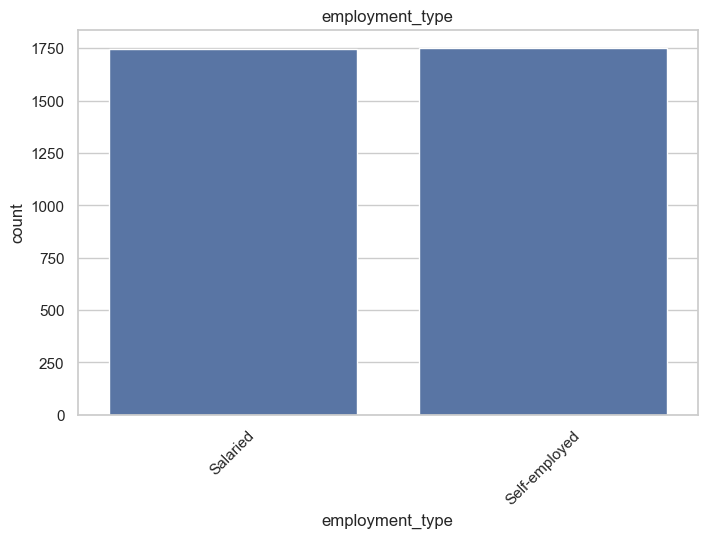

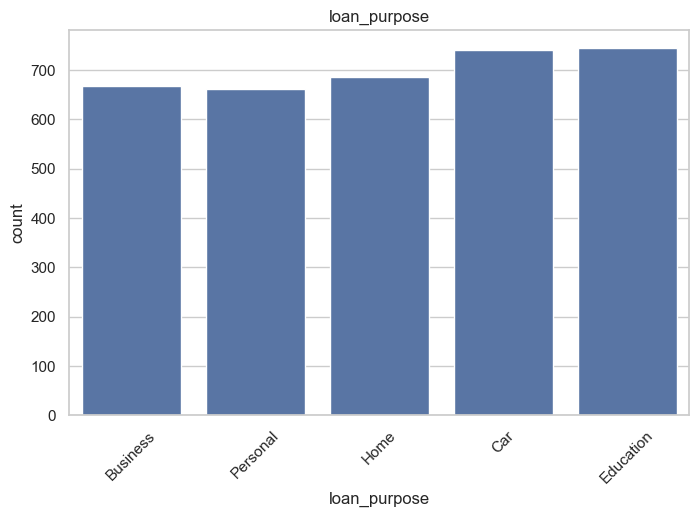

In [18]:
for col in cat_cols:
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

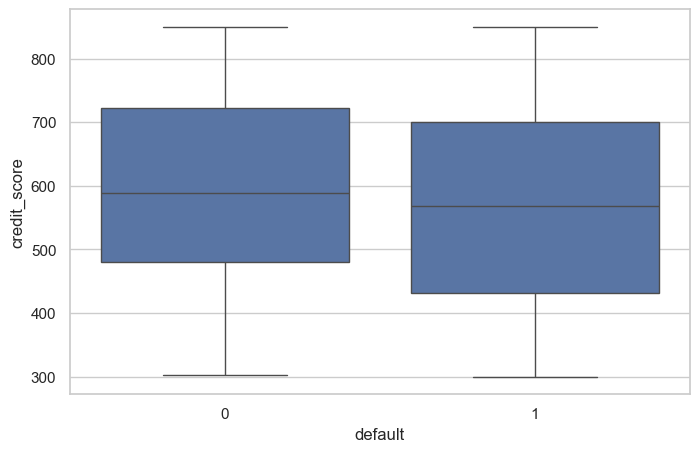

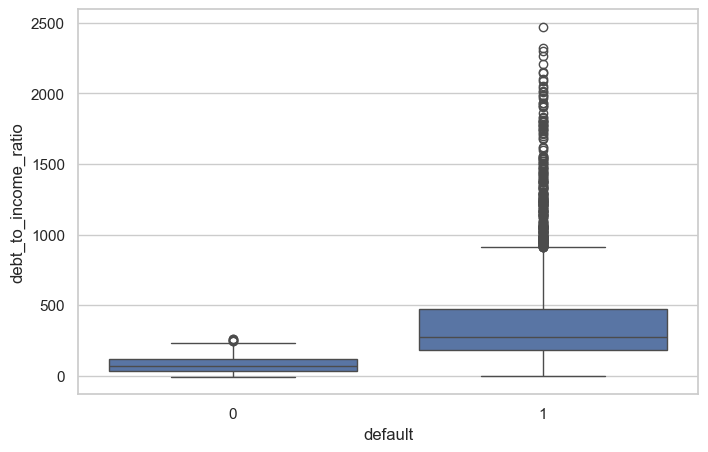

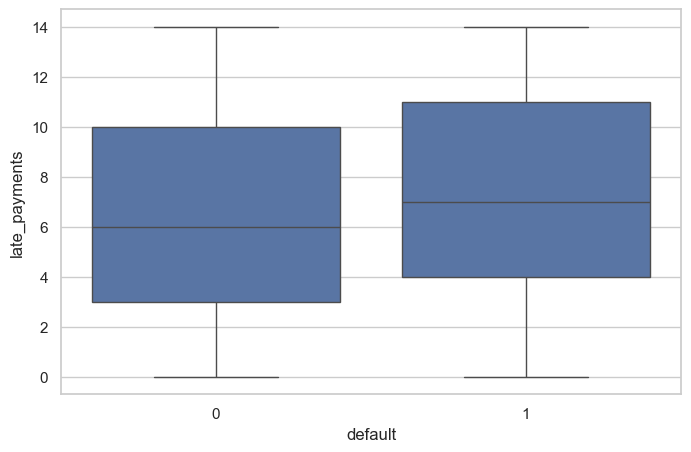

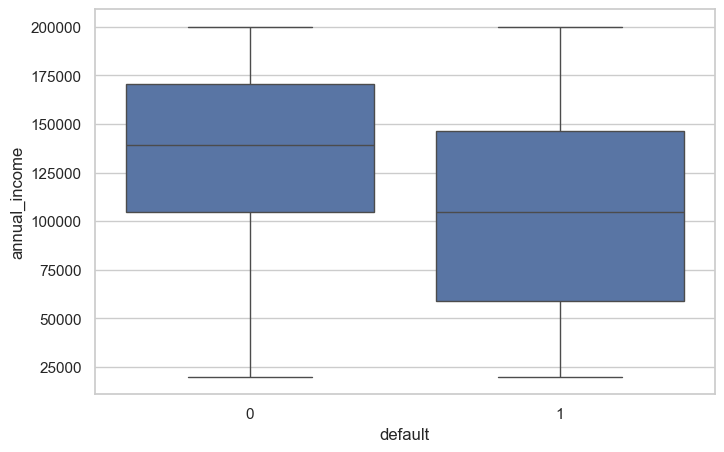

In [19]:
sns.boxplot(x="default", y="credit_score", data=df)
plt.show()

sns.boxplot(x="default", y="debt_to_income_ratio", data=df)
plt.show()

sns.boxplot(x="default", y="late_payments", data=df)
plt.show()

sns.boxplot(x="default", y="annual_income", data=df)
plt.show()

In [20]:
df.groupby("default")[["credit_score",
                       "debt_to_income_ratio",
                       "late_payments",
                       "annual_income"]].mean()

,credit_score,debt_to_income_ratio,late_payments,annual_income
default,,,,
0,593.297568,79.930372,6.157368,132856.380544
1,567.381292,390.632874,7.252767,103932.821135


In [21]:
pd.crosstab(df["education"], df["default"], normalize="index")

pd.crosstab(df["employment_type"], df["default"], normalize="index")

pd.crosstab(df["loan_purpose"], df["default"], normalize="index")

default,0,1
loan_purpose,,
Business,0.196108,0.803892
Car,0.225676,0.774324
Education,0.186828,0.813172
Home,0.202624,0.797376
Personal,0.185801,0.814199


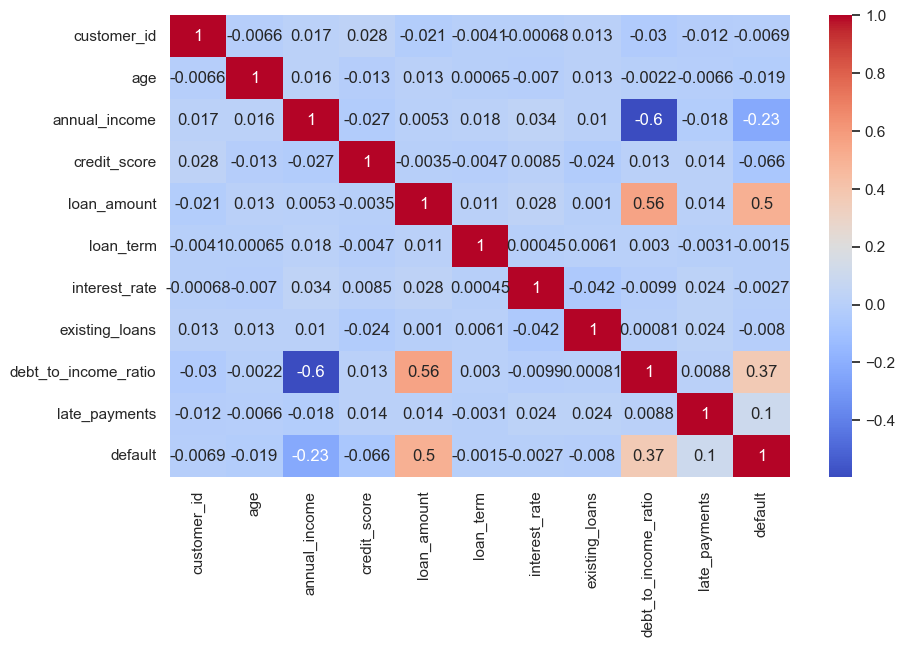

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

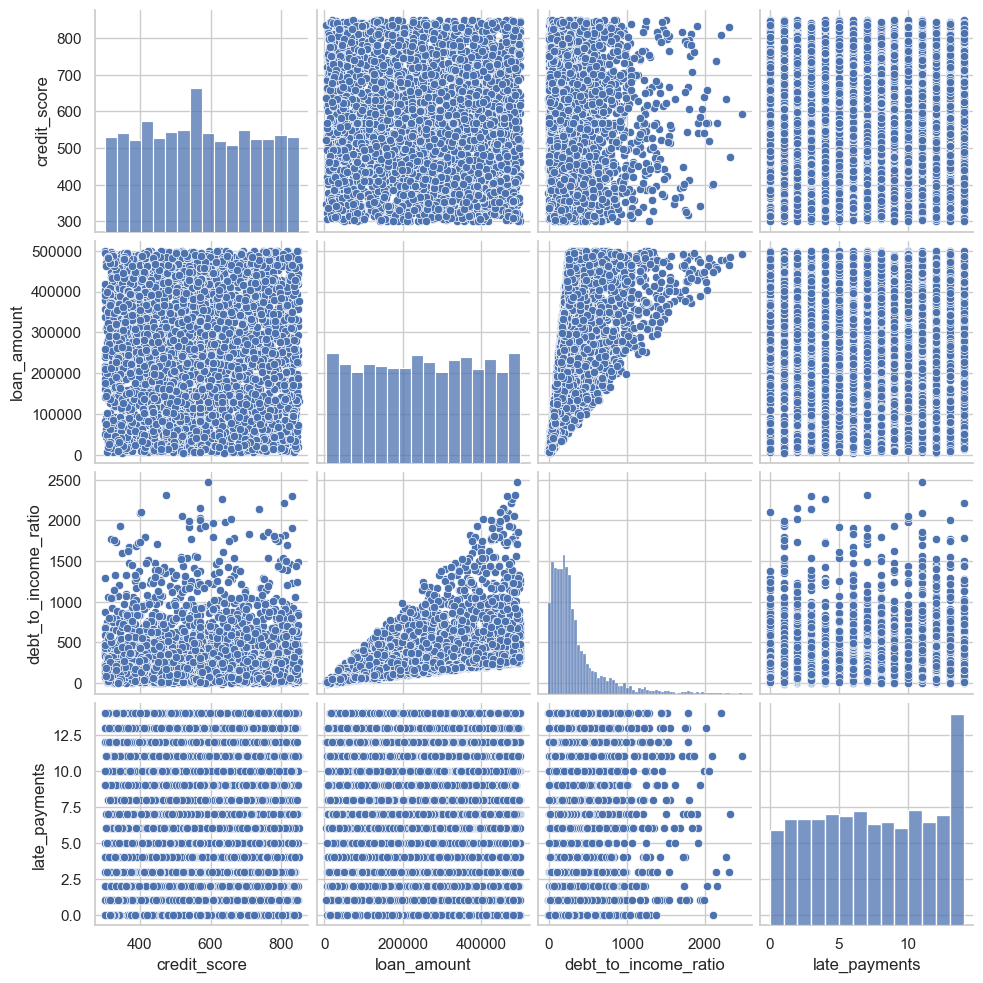

In [23]:
sns.pairplot(df[["credit_score",
                 "loan_amount",
                 "debt_to_income_ratio",
                 "late_payments"]])
plt.show()

In [24]:
risk_combo = df[
    (df["loan_amount"] > df["loan_amount"].quantile(0.75)) &
    (df["credit_score"] < df["credit_score"].quantile(0.25))
]

risk_combo["default"].mean()

1.0

In [25]:
pd.pivot_table(df,
               values="default",
               index="income_category",
               columns="loan_purpose",
               aggfunc="mean")

C:\Users\gsrav\AppData\Local\Temp\ipykernel_30568\1396294833.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df,


loan_purpose,Business,Car,Education,Home,Personal
income_category,,,,,
Low,0.913242,0.893004,0.892430,0.930435,0.910714
Medium,0.800000,0.753906,0.832669,0.814978,0.764151
High,0.703057,0.676349,0.710744,0.646288,0.765487


In [26]:
Q1 = df["loan_amount"].quantile(0.25)
Q3 = df["loan_amount"].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR

df["loan_amount"] = np.where(df["loan_amount"] > upper_limit,
                             upper_limit,
                             df["loan_amount"])

In [27]:
Q1 = df["debt_to_income_ratio"].quantile(0.25)
Q3 = df["debt_to_income_ratio"].quantile(0.75)
IQR = Q3 - Q1

upper_dti = Q3 + 1.5*IQR

df["debt_to_income_ratio"] = np.where(
    df["debt_to_income_ratio"] > upper_dti,
    upper_dti,
    df["debt_to_income_ratio"]
)

In [28]:
df["loan_to_income_ratio"] = df["loan_amount"] / df["annual_income"]

In [29]:
df["risk_score"] = (
    (850 - df["credit_score"]) * 0.4 +
    df["debt_to_income_ratio"] * 0.3 +
    df["late_payments"] * 0.3
)

In [30]:
df["risk_segment"] = pd.qcut(df["risk_score"],
                             3,
                             labels=["Low Risk",
                                     "Medium Risk",
                                     "High Risk"])

pd.crosstab(df["risk_segment"],
            df["default"],
            normalize="index")

default,0,1
risk_segment,,
Low Risk,0.380463,0.619537
Medium Risk,0.200686,0.799314
High Risk,0.017995,0.982005


In [32]:
num_df = df.select_dtypes(include=['int64','float64'])
num_df.corr()["default"].sort_values(ascending=False)

default                 1.000000
loan_amount             0.501829
debt_to_income_ratio    0.454060
risk_score              0.389040
loan_to_income_ratio    0.367347
late_payments           0.102021
loan_term              -0.001504
interest_rate          -0.002656
customer_id            -0.006892
existing_loans         -0.007980
age                    -0.019310
credit_score           -0.066410
annual_income          -0.226602
Name: default, dtype: float64

In [34]:
#Riskiest Loan Purpose
df.groupby("loan_purpose")["default"].mean().sort_values(ascending=False)

loan_purpose
Personal     0.814199
Education    0.813172
Business     0.803892
Home         0.797376
Car          0.774324
Name: default, dtype: float64

# 